In [159]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data 
data = pd.read_csv('merged_data_2022_with_traits_and_values_cleaned_final_cleaned.csv')  

# 1. Display basic info and statistics
print("Dataset Information:")
data.info()

print("\nSummary Statistics:")
print(data.describe())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ch22o162               995 non-null    object 
 1   nomem_encr             995 non-null    int64  
 2   uy22a016               995 non-null    object 
 3   uy22a015               995 non-null    object 
 4   cr22o143               995 non-null    float64
 5   cr22o144               995 non-null    object 
 6   cs22o439               995 non-null    object 
 7   cs22o487               995 non-null    object 
 8   cs22o280               995 non-null    object 
 9   cs22o436               995 non-null    object 
 10  cs22o472               995 non-null    object 
 11  cs22o473               995 non-null    object 
 12  cs22o474               995 non-null    object 
 13  cs22o577               995 non-null    object 
 14  cs22o578               995 non-null  

In [161]:
print(data['herkomstgroep'])
print(data['herkomstgroep'].value_counts(dropna=False))

0      102
1      102
2        0
3        0
4        0
      ... 
990    101
991      0
992      0
993      0
994      0
Name: herkomstgroep, Length: 995, dtype: object
herkomstgroep
0      760
102     73
201     50
202     42
101     36
        34
Name: count, dtype: int64


In [163]:
import pandas as pd

# Example: Ensure the 'herkomstgroep' column is numeric (if it's currently a string)
data['herkomstgroep'] = pd.to_numeric(data['herkomstgroep'], errors='coerce')

# Recoding logic
def recode_background(value):
    if value in [0, 101, 201]:
        return 1  # Western background
    elif value in [102, 202]:
        return 2  # Non-Western/Ethnic background
    elif value == 999:
        return None  # Missing value for unknown origin
    else:
        return None  # Any other unexpected value

# Apply recoding logic to the 'herkomstgroep' column
data['Ethnic_Background'] = data['herkomstgroep'].apply(recode_background)

# Display the updated DataFrame
print(data['Ethnic_Background'].value_counts(dropna=False))
print(data['Ethnic_Background'])


Ethnic_Background
1.0    846
2.0    115
NaN     34
Name: count, dtype: int64
0      2.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
990    1.0
991    1.0
992    1.0
993    1.0
994    1.0
Name: Ethnic_Background, Length: 995, dtype: float64


In [165]:
# Rename columns using a dictionary with descriptive names
data.rename(columns={
    'ch22o162': 'used_hallucinogens',
    'uy22a015': 'LargeSnacks_Weekly',
    'uy22a016': 'SmallSnacks_Daily',  
    'cr22o143': 'Religious_Membership',
    'cr22o144': 'Religion',
    'cs22o439': 'hrs_social_media_viewing',
    'cs22o487': 'hrs_social_media_posting',
    'cs22o280': 'hrs_messaging',
    'cs22o436': 'social_media_frequency',
    'cs22o472': 'days_on_facebook',
    'cs22o473': 'days_on_twitter',
    'cs22o474': 'days_on_LinkedIn',
    'cs22o577': 'days_on_Insta',
    'cs22o578': 'days_on_Snapchat',
    'cs22o579': 'days_on_TikTok',
    'cs22o580': 'days_on_Youtube',
    'cs22o581': 'days_pinterest',
    'cv23o012': 'political_interest',
    'geslacht': 'sex',  
    'leeftijd': 'age',  
    'oplcat': 'education',  
    'burgstat': 'marital_status', 
    'woonvorm': 'living_arrangement',  
    'nettoink_f': 'personal_net_income_eur',  
    'standardized_score': 'mhi5_std_score_2022',
    'class': 'mhi5_class_2022'
}, inplace=True)

# Display the new column names to verify
print("Updated column names:\n", data.columns)

# 1. Display basic info and statistics
print("Dataset Information:")
data.info()


Updated column names:
 Index(['used_hallucinogens', 'nomem_encr', 'SmallSnacks_Daily',
       'LargeSnacks_Weekly', 'Religious_Membership', 'Religion',
       'hrs_social_media_viewing', 'hrs_social_media_posting', 'hrs_messaging',
       'social_media_frequency', 'days_on_facebook', 'days_on_twitter',
       'days_on_LinkedIn', 'days_on_Insta', 'days_on_Snapchat',
       'days_on_TikTok', 'days_on_Youtube', 'days_pinterest',
       'political_interest', 'sex', 'age', 'marital_status',
       'living_arrangement', 'herkomstgroep', 'education', 'nettohh_f',
       'personal_net_income_eur', 'mhi5_std_score_2022', 'mental_health_class',
       'mhi5_class_2022', 'extraversion', 'agreeableness', 'conscientiousness',
       'emotional_stability', 'intellect_imagination', 'self_esteem',
       'instrumental_values', 'terminal_values', 'composite_values',
       'Ethnic_Background'],
      dtype='object')
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 t

In [167]:
# Updated list of columns to convert to numeric
columns_to_convert = [
    'used_hallucinogens', 
    'LargeSnacks_Weekly', 
    'SmallSnacks_Daily', 
    'Religious_Membership', 
    'Religion',
    'hrs_social_media_viewing', 
    'hrs_social_media_posting', 
    'hrs_messaging',
    'social_media_frequency',
    'political_interest',
    'days_on_facebook',
    'days_on_twitter',
    'days_on_LinkedIn',
    'days_on_Insta',
    'days_on_Snapchat',
    'days_on_TikTok',
    'days_on_Youtube',
    'days_pinterest',
    'education',            
    'nettohh_f',         
    'personal_net_income_eur' 
]

# Convert the specified columns to numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion to confirm
print(data[columns_to_convert].dtypes)


used_hallucinogens          float64
LargeSnacks_Weekly          float64
SmallSnacks_Daily           float64
Religious_Membership        float64
Religion                    float64
hrs_social_media_viewing    float64
hrs_social_media_posting    float64
hrs_messaging               float64
social_media_frequency      float64
political_interest          float64
days_on_facebook            float64
days_on_twitter             float64
days_on_LinkedIn            float64
days_on_Insta               float64
days_on_Snapchat            float64
days_on_TikTok              float64
days_on_Youtube             float64
days_pinterest              float64
education                   float64
nettohh_f                   float64
personal_net_income_eur     float64
dtype: object


In [169]:
# Drop the 'herkomstgroep' and 'mental_health_class' columns
data = data.drop(columns=['herkomstgroep', 'mental_health_class', 'nettohh_f'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   used_hallucinogens        992 non-null    float64
 1   nomem_encr                995 non-null    int64  
 2   SmallSnacks_Daily         991 non-null    float64
 3   LargeSnacks_Weekly        991 non-null    float64
 4   Religious_Membership      995 non-null    float64
 5   Religion                  218 non-null    float64
 6   hrs_social_media_viewing  901 non-null    float64
 7   hrs_social_media_posting  907 non-null    float64
 8   hrs_messaging             871 non-null    float64
 9   social_media_frequency    986 non-null    float64
 10  days_on_facebook          950 non-null    float64
 11  days_on_twitter           950 non-null    float64
 12  days_on_LinkedIn          950 non-null    float64
 13  days_on_Insta             950 non-null    float64
 14  days_on_Sn

In [217]:
import pandas as pd

# Load datasets (modify file paths if needed)
health_file_path = r"C:\Users\u1246538\Downloads\liss-data\Liss_datasets\health2022.csv" 
background_file_path =  r"C:\Users\u1246538\Downloads\liss-data\Liss_datasets\background2022.csv"
health_2022 = pd.read_csv(health_file_path, delimiter=';', on_bad_lines='skip')
background_2022 = pd.read_csv(background_file_path, delimiter=';', on_bad_lines='skip')

print(background_2022.columns)



Index(['nomem_encr', 'nohouse_encr', 'wave', 'geslacht', 'gender', 'positie',
       'gebjaar', 'leeftijd', 'lftdcat', 'lftdhhh', 'aantalhh', 'aantalki',
       'partner', 'burgstat', 'woonvorm', 'woning', 'sted', 'belbezig',
       'brutoink', 'brutoink_f', 'nettoink', 'netinc', 'nettoink_f',
       'brutocat', 'nettocat', 'brutohh_f', 'nettohh_f', 'oplzon', 'oplmet',
       'oplcat', 'doetmee', 'werving', 'herkomstgroep', 'simpc'],
      dtype='object')


In [223]:
# Ensure 'nomem_encr' is the same type in all datasets
data['nomem_encr'] = data['nomem_encr'].astype(str)
health_2022['nomem_encr'] = health_2022['nomem_encr'].astype(str)
background_2022['nomem_encr'] = background_2022['nomem_encr'].astype(str)

# Select only the columns you want to add from health dataset (making sure 'nomem_encr' stays)
health_columns_to_add = ['ch22o004', 'ch22o020','ch22o077']  # Replace with actual column names
health_2022 = health_2022[['nomem_encr'] + health_columns_to_add]  

# Select only 'nettocat' from the background dataset
background_2022 = background_2022[['nomem_encr', 'nettocat', 'gender', 'belbezig']]  

# Merge health data with main dataset
merged_data_2022 = data.merge(health_2022, on='nomem_encr', how='left')

# Merge 'nettocat' from background dataset
merged_data_2022 = merged_data_2022.merge(background_2022, on='nomem_encr', how='left')

# Convert 'nettocat' to numeric (if necessary)
merged_data_2022['nettocat'] = pd.to_numeric(merged_data_2022['nettocat'], errors='coerce')
merged_data_2022['gender'] = pd.to_numeric(merged_data_2022['gender'], errors='coerce')
merged_data_2022['belbezig'] = pd.to_numeric(merged_data_2022['belbezig'], errors='coerce')
merged_data_2022['ch22o077'] = pd.to_numeric(merged_data_2022['ch22o077'], errors='coerce')
merged_data_2022['ch22o020'] = pd.to_numeric(merged_data_2022['ch22o020'], errors='coerce')
# Save the merged dataset (optional)
merged_data_2022.to_csv("merged_dataset2022.csv", index=False)

print("Health data + background data successfully merged!")

Health data + background data successfully merged!


In [225]:
# File path for the new social media dataset (adjust as needed)
social_media_file_path = r"C:\Users\u1246538\Downloads\liss-data\Notebooks_MHI-5\socialmedia2022.csv" 


# Load the dataset
# let op here moet  een comma en niet een semicolon bij delimiter( als je semicolon zet werkt het niet)loaden kijk naar de dataset
# als een dataset niet wil loaden kijk naar de dataset met dataset.head() to see how things are looking. toen zag ik dat niet semicolon tussen de variabelen/kollomen waren maar comma
social_media_2022 = pd.read_csv( social_media_file_path, delimiter=',', on_bad_lines='skip')

# Check the first few rows to see if columns are parsed correctly
print(social_media_2022.head())





   nomem_encr  cs22o_m  cs22o001 cs22o003 cs22o004 cs22o005 cs22o006 cs22o007  \
0      800001   202210         8        0        0        0        1        0   
1      800002   202210         7        1        0        0        0        0   
2      800009   202210        10        0        0        0        0        1   
3      800015   202210         4        1        0        0        0        0   
4      800028   202210         9        1        0        0        0        0   

  cs22o008 cs22o009  ... cs22o411 cs22o412 cs22o413 cs22o414    cs22o375  \
0        0        0  ...        4        3        3        3  17-10-2022   
1        0        0  ...        4        3        4        3  16-10-2022   
2        0        0  ...        4        2        4        4  24-10-2022   
3        1        0  ...        5        1        1        1  17-10-2022   
4        1        0  ...        3        2        3        3  03-10-2022   

   cs22o376    cs22o377  cs22o378 cs22o415 loneliness_sc

In [227]:

merged_data_2022= pd.read_csv(r"C:\Users\u1246538\Downloads\liss-data\Notebooks_MHI-5\merged_dataset2022.csv")
# Select only the 'loneliness_score' column (and 'nomem_encr' for the merge)
social_media_2022 = social_media_2022[['nomem_encr', 'loneliness_score']]  

# Merge loneliness_score with the existing merged data
merged_data_2022 = merged_data_2022.merge(social_media_2022, on='nomem_encr', how='left')

# Optionally, convert 'loneliness_score' to numeric (if needed)
merged_data_2022['loneliness_score'] = pd.to_numeric(merged_data_2022['loneliness_score'], errors='coerce')

# Save the final merged dataset
merged_data_2022.to_csv("final_merged_dataset2022.csv", index=False)

print("Loneliness score successfully merged with the dataset!")


Loneliness score successfully merged with the dataset!


In [231]:
merged_data_2022.head()

used_hallucinogens  nomem_encr  SmallSnacks_Daily  LargeSnacks_Weekly  \
0                 1.0      800015                1.0                 1.0   
1                 1.0      800100                4.0                 2.0   
2                 1.0      800201                1.0                 4.0   
3                 1.0      800228                2.0                 1.0   
4                 1.0      800392                2.0                 2.0   

   Religious_Membership  Religion  hrs_social_media_viewing  \
0                   2.0       NaN                       2.0   
1                   1.0      10.0                      14.0   
2                   2.0       NaN                       7.0   
3                   2.0       NaN                       NaN   
4                   2.0       NaN                       4.0   

   hrs_social_media_posting  hrs_messaging  social_media_frequency  ...  \
0                       0.0            0.0                     1.0  ...   
1                       0.0            4.0                     3.0  ...   
2                       6.0            4.0                     6.0  ...   
3                       0.0            NaN                     5.0  ...   
4                       1.0            1.0                     7.0  ...   

   terminal_values  composite_values  Ethnic_Background  ch22o004  ch22o020  \
0         5.722222          5.750000                2.0         3       1.0   
1         6.500000          6.500000                2.0         2       3.0   
2         4.944444          4.638889                1.0         3       2.0   
3         5.333333          4.777778                1.0         3       2.0   
4         4.666667          4.833333                1.0         3       2.0   

   ch22o077  nettocat  gender  belbezig  loneliness_score  
0       0.0       7.0     999         1                 0  
1       0.0       4.0     999         1                 0  
2       0.0       4.0     999         1                 0  
3       0.0       6.0     999         9                 0  
4       0.0       5.0     999         4                 0  

[5 rows x 44 columns]

In [233]:
# in case you need to restart the kernel again you need to read the saved file here. but now the df i sstil in the memory so no need now. 

# Load the dataset again
#data = pd.read_csv("merged_dataset2022.csv")

# Check if it's loaded correctly
#print(data.head())

In [235]:
#print(merged_data_2022.head())
print(merged_data_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   used_hallucinogens        992 non-null    float64
 1   nomem_encr                995 non-null    int64  
 2   SmallSnacks_Daily         991 non-null    float64
 3   LargeSnacks_Weekly        991 non-null    float64
 4   Religious_Membership      995 non-null    float64
 5   Religion                  218 non-null    float64
 6   hrs_social_media_viewing  901 non-null    float64
 7   hrs_social_media_posting  907 non-null    float64
 8   hrs_messaging             871 non-null    float64
 9   social_media_frequency    986 non-null    float64
 10  days_on_facebook          950 non-null    float64
 11  days_on_twitter           950 non-null    float64
 12  days_on_LinkedIn          950 non-null    float64
 13  days_on_Insta             950 non-null    float64
 14  days_on_Sn

count    995.000000
mean       7.029146
std        9.408468
min        0.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       74.000000
Name: hours_on_social_media, dtype: float64


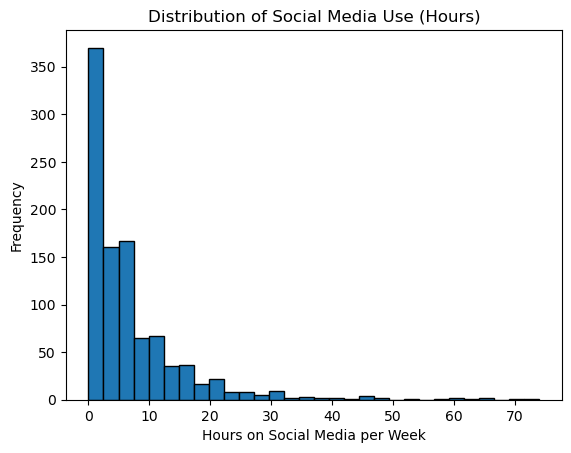

In [237]:
# Step 1: Handle missing values by replacing NaN with 0
merged_data_2022[['hrs_social_media_viewing', 'hrs_messaging', 'hrs_social_media_posting']] = \
    merged_data_2022[['hrs_social_media_viewing', 'hrs_messaging', 'hrs_social_media_posting']].fillna(0)

# Step 2: Compute total hours spent on social media (Van der Velden method + Posting)
merged_data_2022['hours_on_social_media'] = (merged_data_2022['hrs_social_media_viewing'] +
                                             merged_data_2022['hrs_messaging'] +
                                             merged_data_2022['hrs_social_media_posting'])

# Step 3: Drop the days-based variables if no longer needed
platforms = ['days_on_facebook', 'days_on_twitter', 'days_on_LinkedIn',
             'days_on_Insta', 'days_on_Snapchat', 'days_on_TikTok',
             'days_on_Youtube', 'days_pinterest']

# Drop platform-specific day variables if not needed
merged_data_2022 = merged_data_2022.drop(columns=platforms, errors='ignore') 

# Step 4: Save dataset with only the new hours-based variable
merged_data_2022.to_csv("merged_data_2022_with_social_media_hours.csv", index=False)

# Step 5: Check the distribution
print(merged_data_2022['hours_on_social_media'].describe())

# Optional: Visualize the distribution
import matplotlib.pyplot as plt
plt.hist(merged_data_2022['hours_on_social_media'], bins=30, edgecolor='black')
plt.xlabel("Hours on Social Media per Week")
plt.ylabel("Frequency")
plt.title("Distribution of Social Media Use (Hours)")
plt.show()

In [239]:
merged_data_2022.columns

Index(['used_hallucinogens', 'nomem_encr', 'SmallSnacks_Daily',
       'LargeSnacks_Weekly', 'Religious_Membership', 'Religion',
       'hrs_social_media_viewing', 'hrs_social_media_posting', 'hrs_messaging',
       'social_media_frequency', 'political_interest', 'sex', 'age',
       'marital_status', 'living_arrangement', 'education',
       'personal_net_income_eur', 'mhi5_std_score_2022', 'mhi5_class_2022',
       'extraversion', 'agreeableness', 'conscientiousness',
       'emotional_stability', 'intellect_imagination', 'self_esteem',
       'instrumental_values', 'terminal_values', 'composite_values',
       'Ethnic_Background', 'ch22o004', 'ch22o020', 'ch22o077', 'nettocat',
       'gender', 'belbezig', 'loneliness_score', 'hours_on_social_media'],
      dtype='object')

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns for better readability
merged_data_2022 = merged_data_2022.rename(columns={
    'ch22o004': 'Self-Rated_Health',
    'ch22o020': 'Health_Hindrance_to_Daily_Functioning',
    'ch22o077': 'Sleeping_Problems',
    'nettocat': 'Personal_Net_Income_Category',
    'belbezig': 'Employment_status'
})

merged_data_2022.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   used_hallucinogens                     992 non-null    float64
 1   nomem_encr                             995 non-null    int64  
 2   SmallSnacks_Daily                      991 non-null    float64
 3   LargeSnacks_Weekly                     991 non-null    float64
 4   Religious_Membership                   995 non-null    float64
 5   Religion                               218 non-null    float64
 6   hrs_social_media_viewing               995 non-null    float64
 7   hrs_social_media_posting               995 non-null    float64
 8   hrs_messaging                          995 non-null    float64
 9   social_media_frequency                 986 non-null    float64
 10  political_interest                     980 non-null    float64
 11  sex   


Skewness of variables:
used_hallucinogens         12.854552
SmallSnacks_Daily           1.224451
LargeSnacks_Weekly          1.514029
Religious_Membership       -5.894156
Religion                    0.767684
social_media_frequency     -1.054628
political_interest          0.073782
sex                        -0.123030
age                        -0.484860
marital_status              0.432136
living_arrangement          0.211063
education                  -0.381548
personal_net_income_eur     0.773639
extraversion               -0.276315
agreeableness              -0.560240
conscientiousness          -0.269106
emotional_stability        -0.305749
intellect_imagination       0.041109
self_esteem                -0.816696
instrumental_values        -0.385745
terminal_values            -0.501298
composite_values           -0.405176
Ethnic_Background           2.347264
mhi5_std_score_2022        -1.096283
mhi5_class_2022             1.424199
dtype: float64


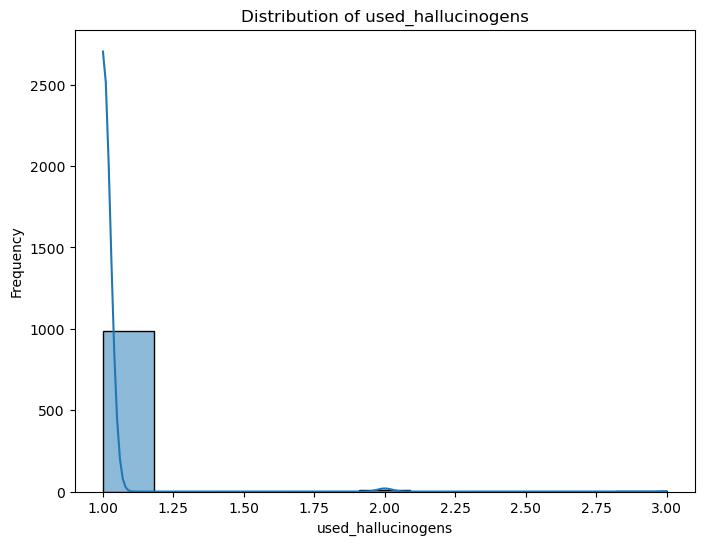

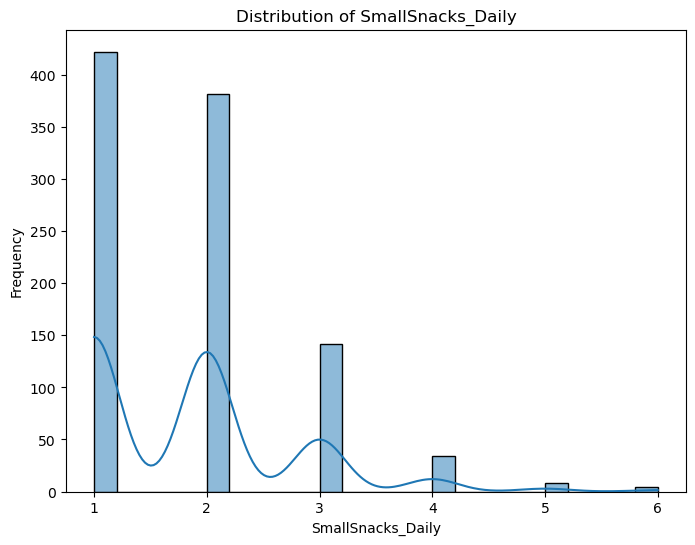

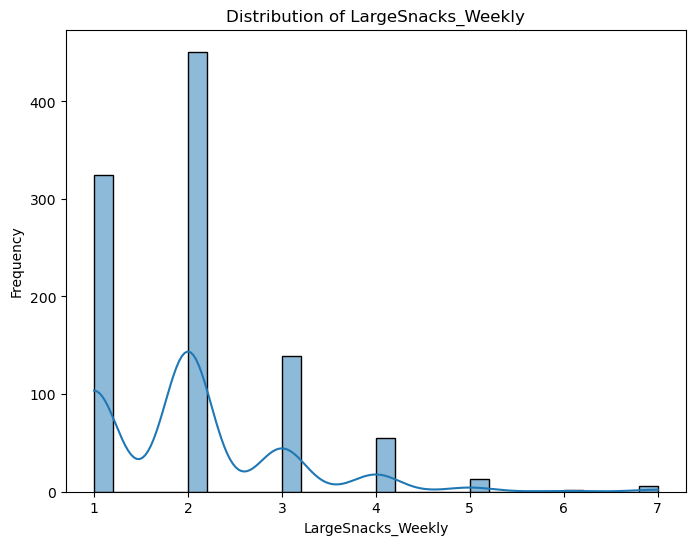

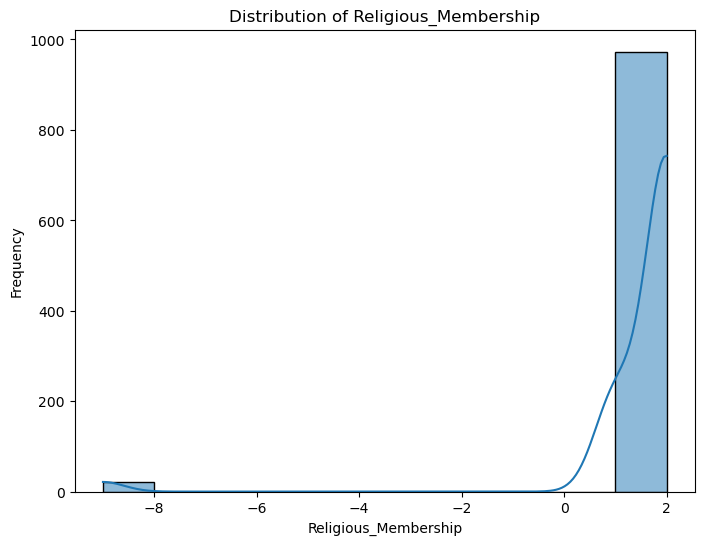

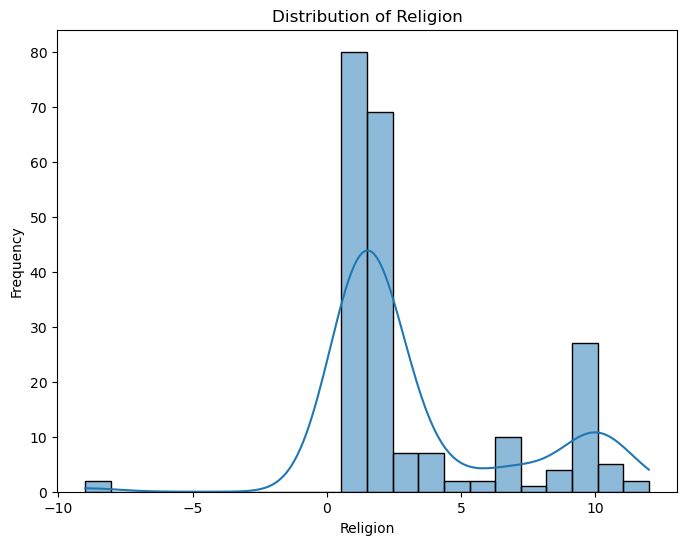

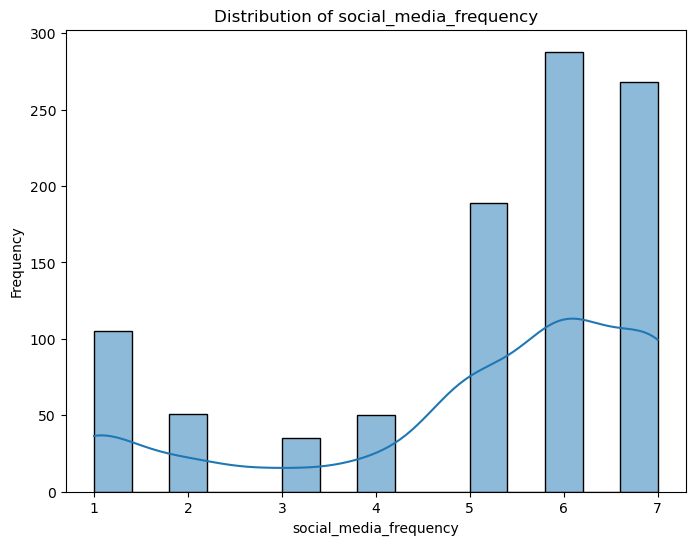

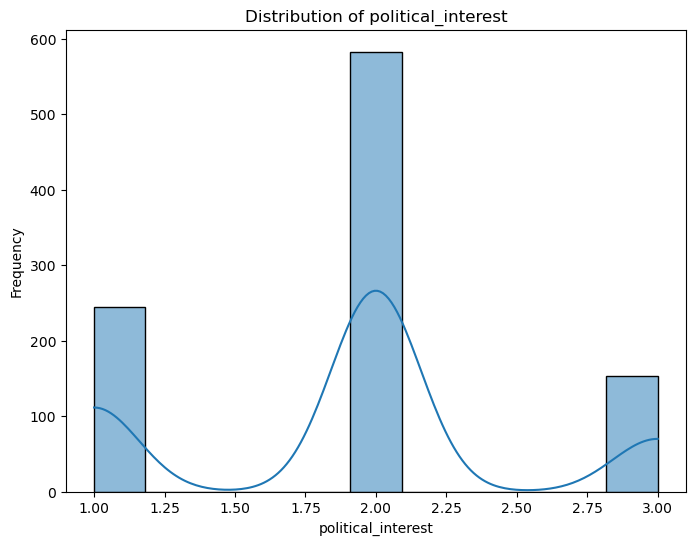

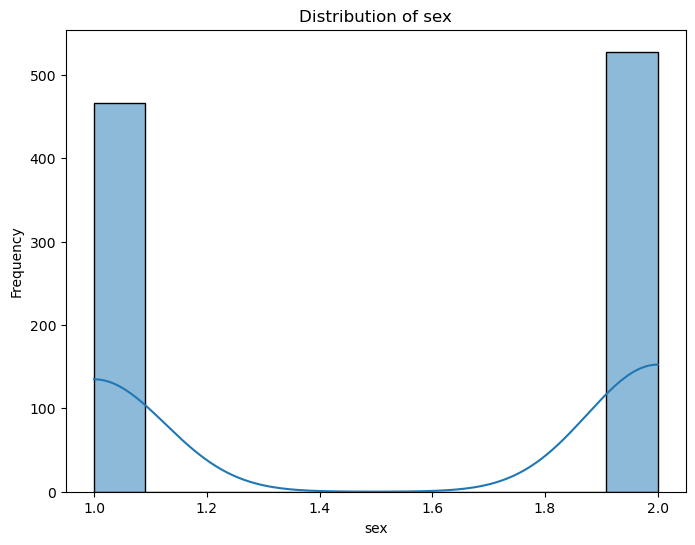

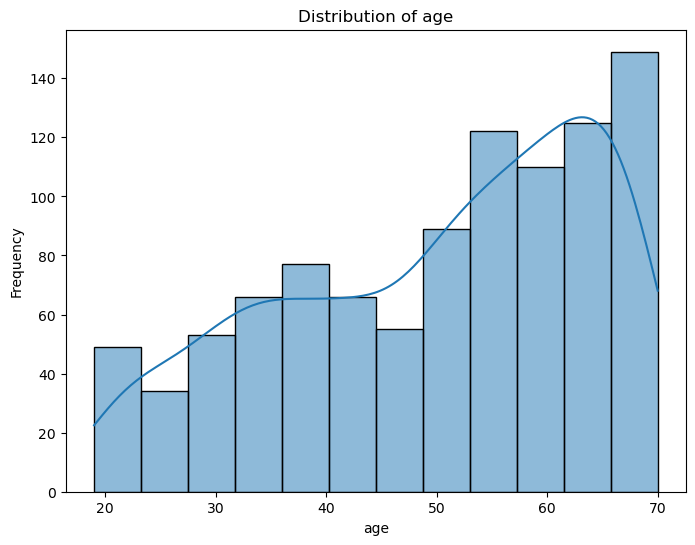

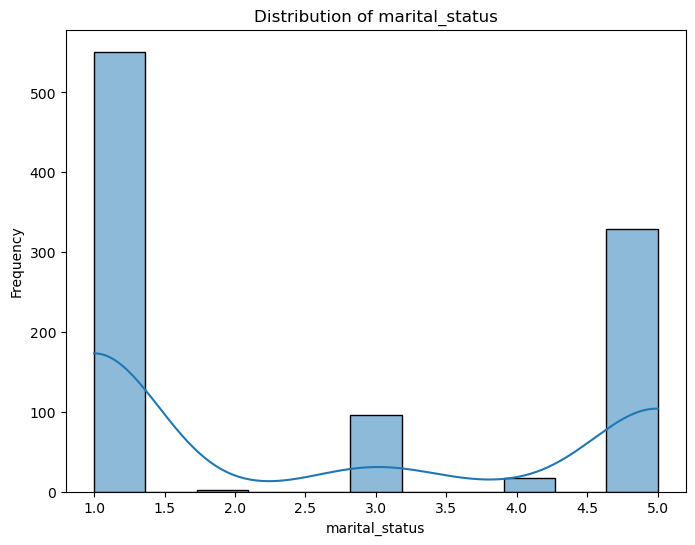

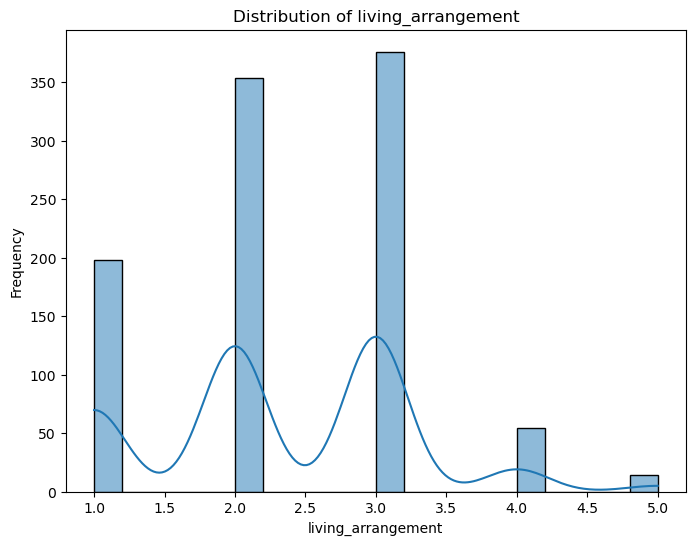

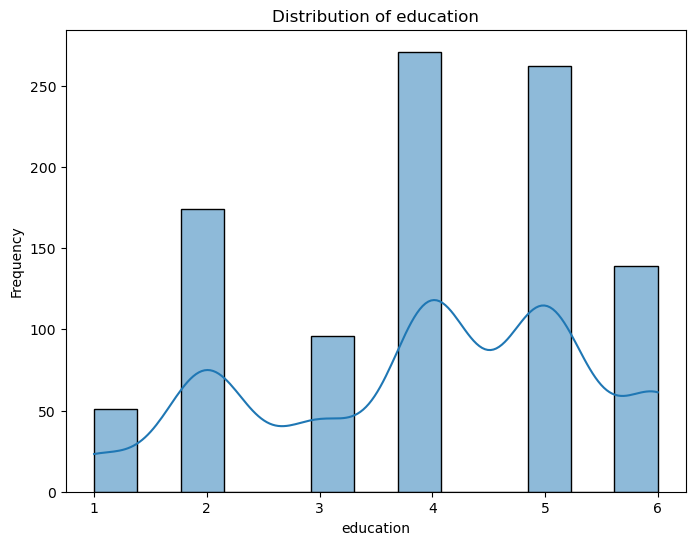

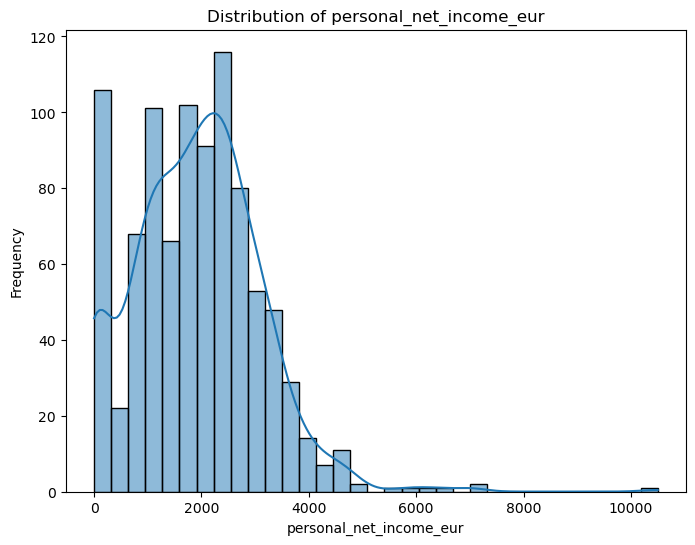

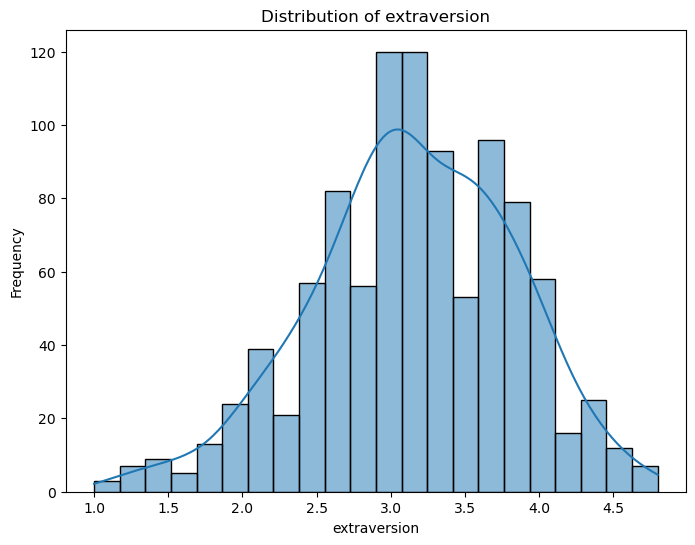

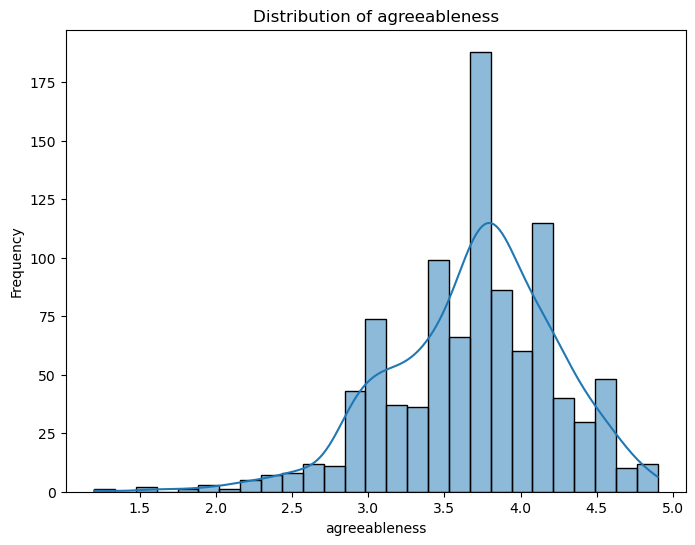

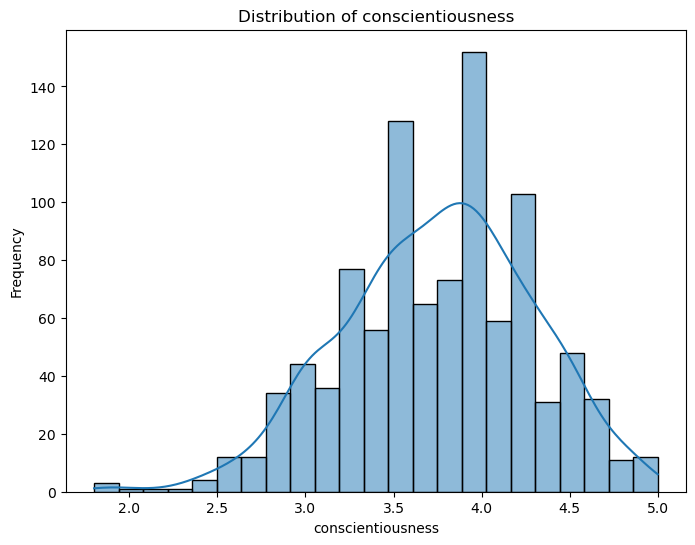

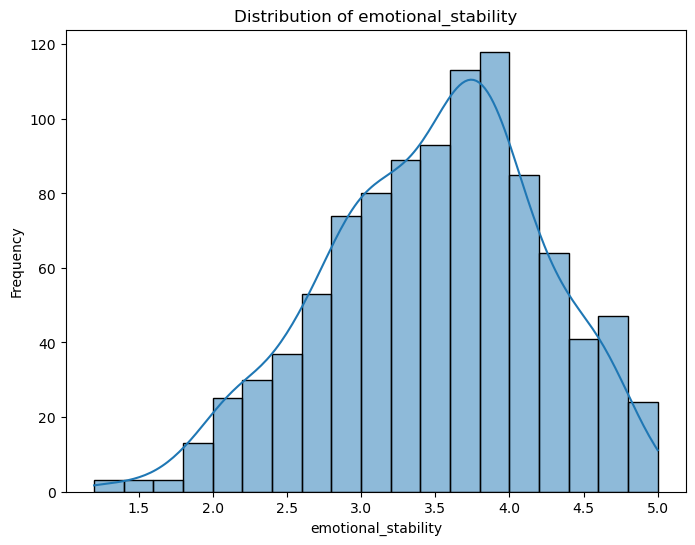

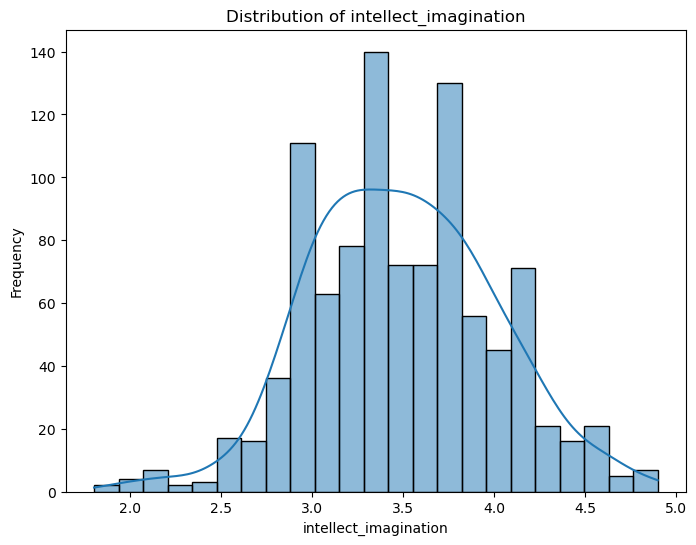

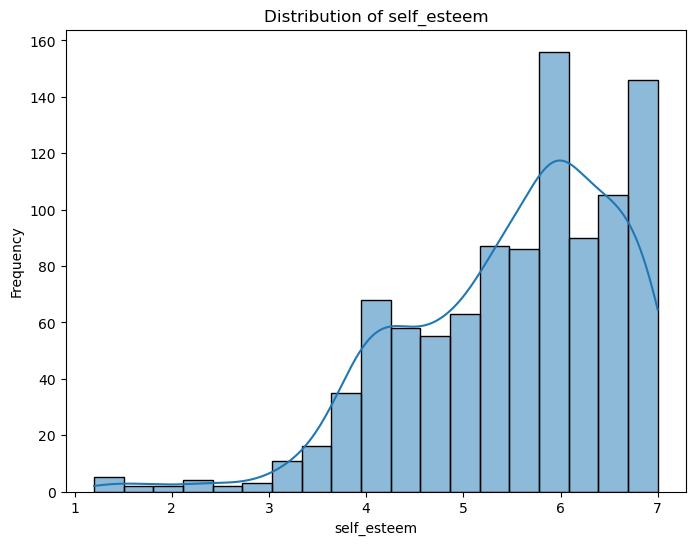

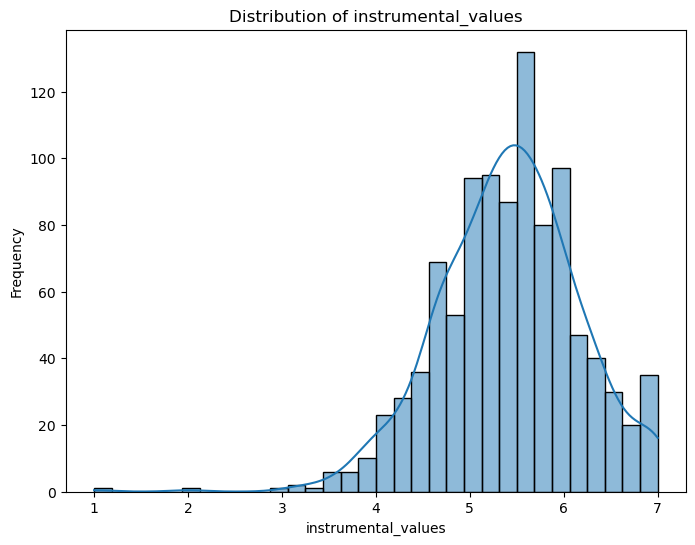

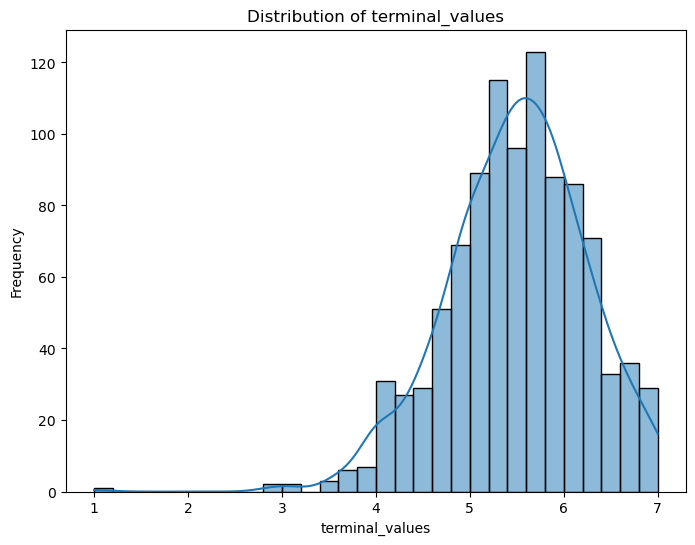

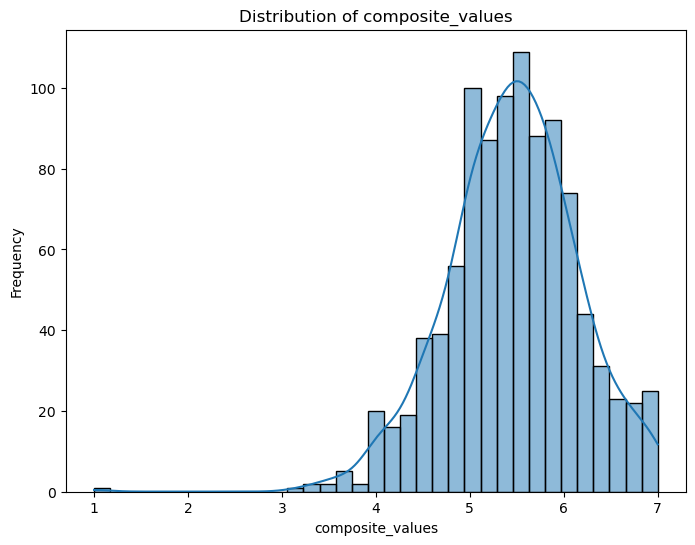

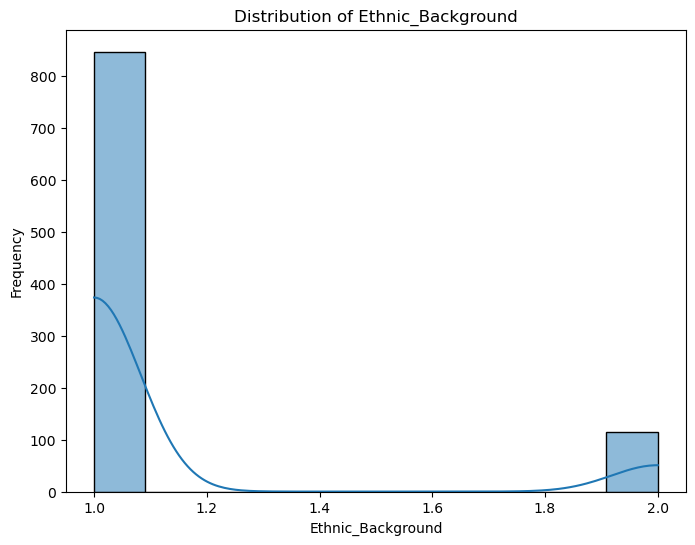

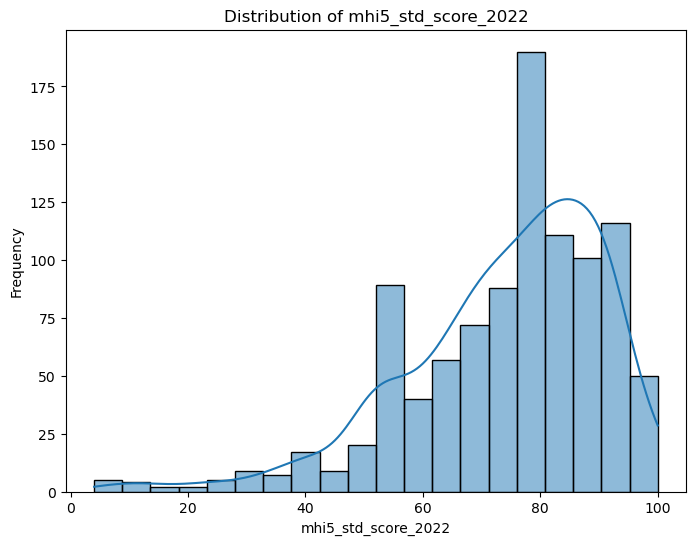

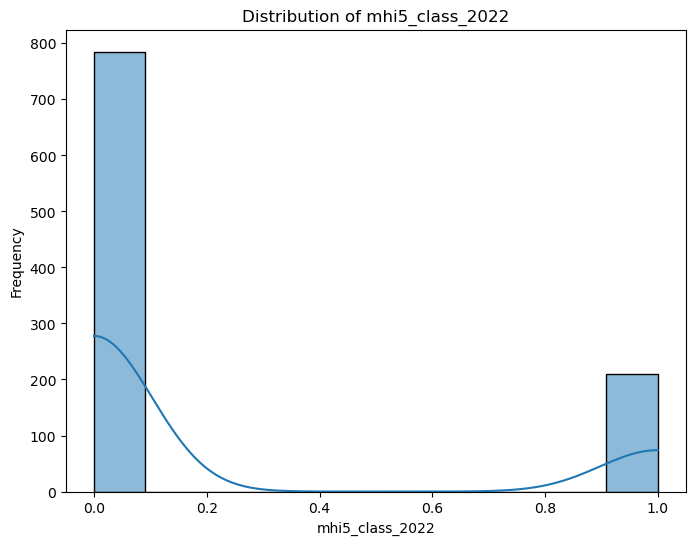

In [243]:
# 2. Distribution plots (individual plots for each variable)

predictors = ['used_hallucinogens', 'SmallSnacks_Daily', 'LargeSnacks_Weekly', 'Religious_Membership', 'Religion', 'social_media_frequency', 'political_interest', 'sex', 'age', 'marital_status', 'living_arrangement', 'education', 'personal_net_income_eur','extraversion', 'agreeableness', 
              'conscientiousness', 'emotional_stability', 'intellect_imagination', 'self_esteem','instrumental_values', 'terminal_values', 'composite_values',
       'Ethnic_Background', ]  # Replace with actual predictor variable names
target_2022 = ['mhi5_std_score_2022', 'mhi5_class_2022']

# Check skewness for each variable
print("\nSkewness of variables:")
skewness = merged_data_2022[predictors + target_2022].skew()
print(skewness)

# Plotting distributions for predictors
for col in predictors + target_2022:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_data_2022[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()





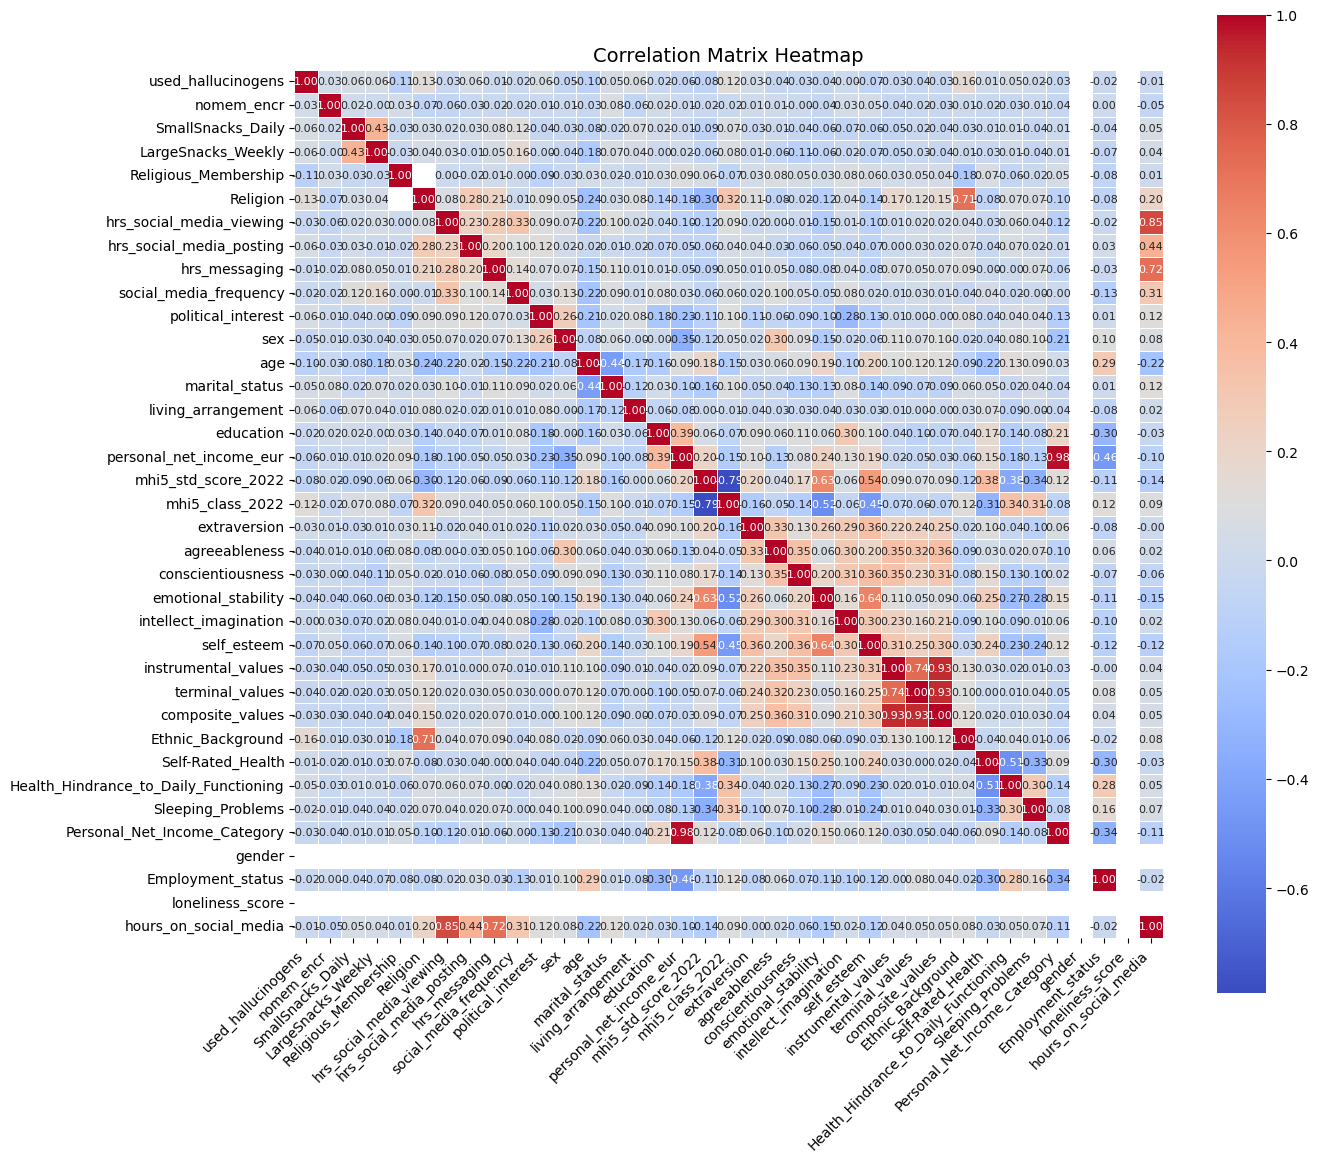

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = merged_data_2022.corr()

# Set figure size
plt.figure(figsize=(14, 12))

# Create heatmap with annotations
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",    # Balanced colormap
    annot=True,         # Show correlation values
    fmt=".2f",          # Limit decimal places
    linewidths=0.5,
    square=True,
    cbar=True,
    annot_kws={"size": 8}  # Reduce annotation font size
)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Title and layout
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


In [245]:
import numpy as np

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr_pairs = [(col, index) for col in upper_triangle.columns for index in upper_triangle.index if abs(upper_triangle[col][index]) > 0.8]

# Print correlated pairs
for col1, col2 in high_corr_pairs:
    print(f"{col1} is highly correlated with {col2}")




composite_values is highly correlated with instrumental_values
composite_values is highly correlated with terminal_values
Personal_Net_Income_Category is highly correlated with personal_net_income_eur
hours_on_social_media is highly correlated with hrs_social_media_viewing


In [246]:
# Drop one of the highly correlated features to reduce redundancy and multicollinearity
merged_data_2022 = merged_data_2022.drop(columns=['instrumental_values', 'terminal_values', 'personal_net_income_eur', 'hrs_social_media_viewing', 'hrs_social_media_posting', 'hrs_messaging' ])

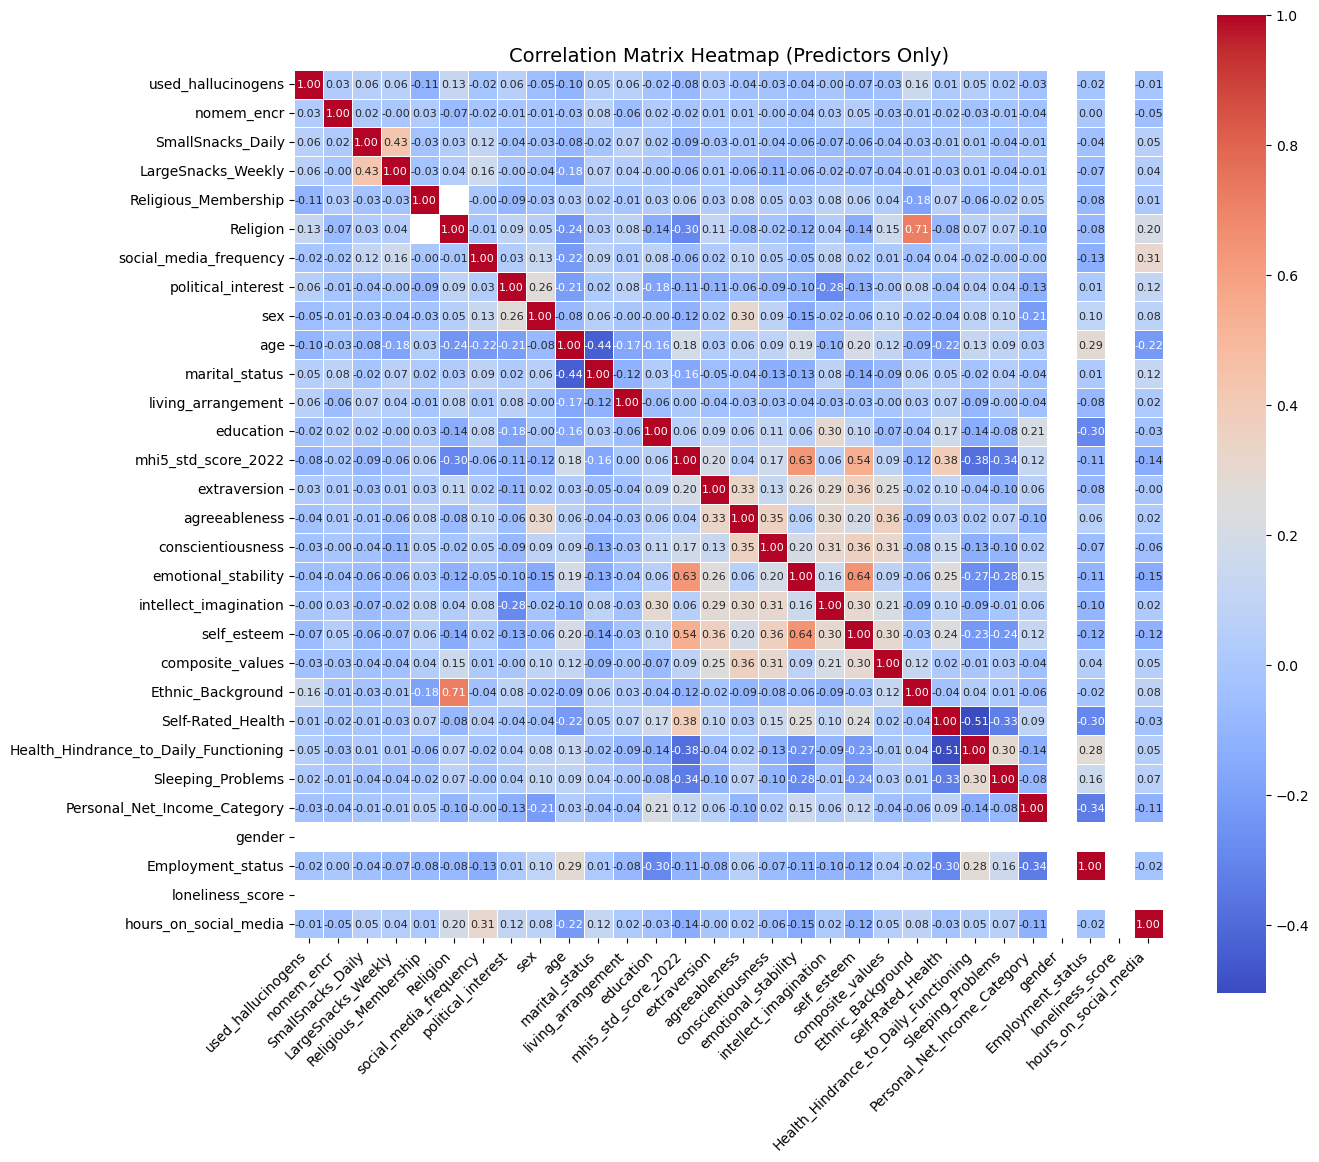

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the target variable (mhi_5) and select only predictors
predictors = merged_data_2022.drop(columns=['mhi5_class_2022'])

# Compute correlation matrix for predictors only
corr_matrix_predictors = predictors.corr()

# Set figure size
plt.figure(figsize=(14, 12))

# Create heatmap with annotations
sns.heatmap(
    corr_matrix_predictors,
    cmap="coolwarm",    # Balanced colormap
    annot=True,         # Show correlation values
    fmt=".2f",          # Limit decimal places
    linewidths=0.5,
    square=True,
    cbar=True,
    annot_kws={"size": 8}  # Reduce annotation font size
)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Title and layout
plt.title("Correlation Matrix Heatmap (Predictors Only)", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


In [250]:
import numpy as np

# Select upper triangle of the correlation matrix for predictors
upper_triangle = corr_matrix_predictors.where(np.triu(np.ones(corr_matrix_predictors.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr_pairs = [(col, index) for col in upper_triangle.columns for index in upper_triangle.index if abs(upper_triangle[col][index]) > 0.8]

# Check if there are any high correlation pairs
if high_corr_pairs:
    # Print correlated pairs
    for col1, col2 in high_corr_pairs:
        print(f"{col1} is highly correlated with {col2}")
else:
    print("There are no highly correlated predictors (correlation > 0.8).")



There are no highly correlated predictors (correlation > 0.8).


In [255]:
import pandas as pd

# Assuming df is your DataFrame
unique_counts = merged_data_2022.nunique()

# Display unique counts for each variable
print(unique_counts)


used_hallucinogens                         3
nomem_encr                               995
SmallSnacks_Daily                          6
LargeSnacks_Weekly                         7
Religious_Membership                       3
Religion                                  13
social_media_frequency                     7
political_interest                         3
sex                                        2
age                                       52
marital_status                             5
living_arrangement                         5
education                                  6
mhi5_std_score_2022                       25
mhi5_class_2022                            2
extraversion                              39
agreeableness                             34
conscientiousness                         32
emotional_stability                       38
intellect_imagination                     32
self_esteem                               52
composite_values                         155
Ethnic_Bac

In [257]:
# Define a threshold to separate categorical and continuous variables
threshold = 20

# Identify categorical and continuous variables
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()

print("Categorical Variables:", categorical_vars)
print('-----------------------')
print("Continuous Variables:", continuous_vars)


Categorical Variables: ['used_hallucinogens', 'SmallSnacks_Daily', 'LargeSnacks_Weekly', 'Religious_Membership', 'Religion', 'social_media_frequency', 'political_interest', 'sex', 'marital_status', 'living_arrangement', 'education', 'mhi5_class_2022', 'Ethnic_Background', 'Self-Rated_Health', 'Health_Hindrance_to_Daily_Functioning', 'Sleeping_Problems', 'Personal_Net_Income_Category', 'gender', 'Employment_status', 'loneliness_score']
-----------------------
Continuous Variables: ['nomem_encr', 'age', 'mhi5_std_score_2022', 'extraversion', 'agreeableness', 'conscientiousness', 'emotional_stability', 'intellect_imagination', 'self_esteem', 'composite_values', 'hours_on_social_media']


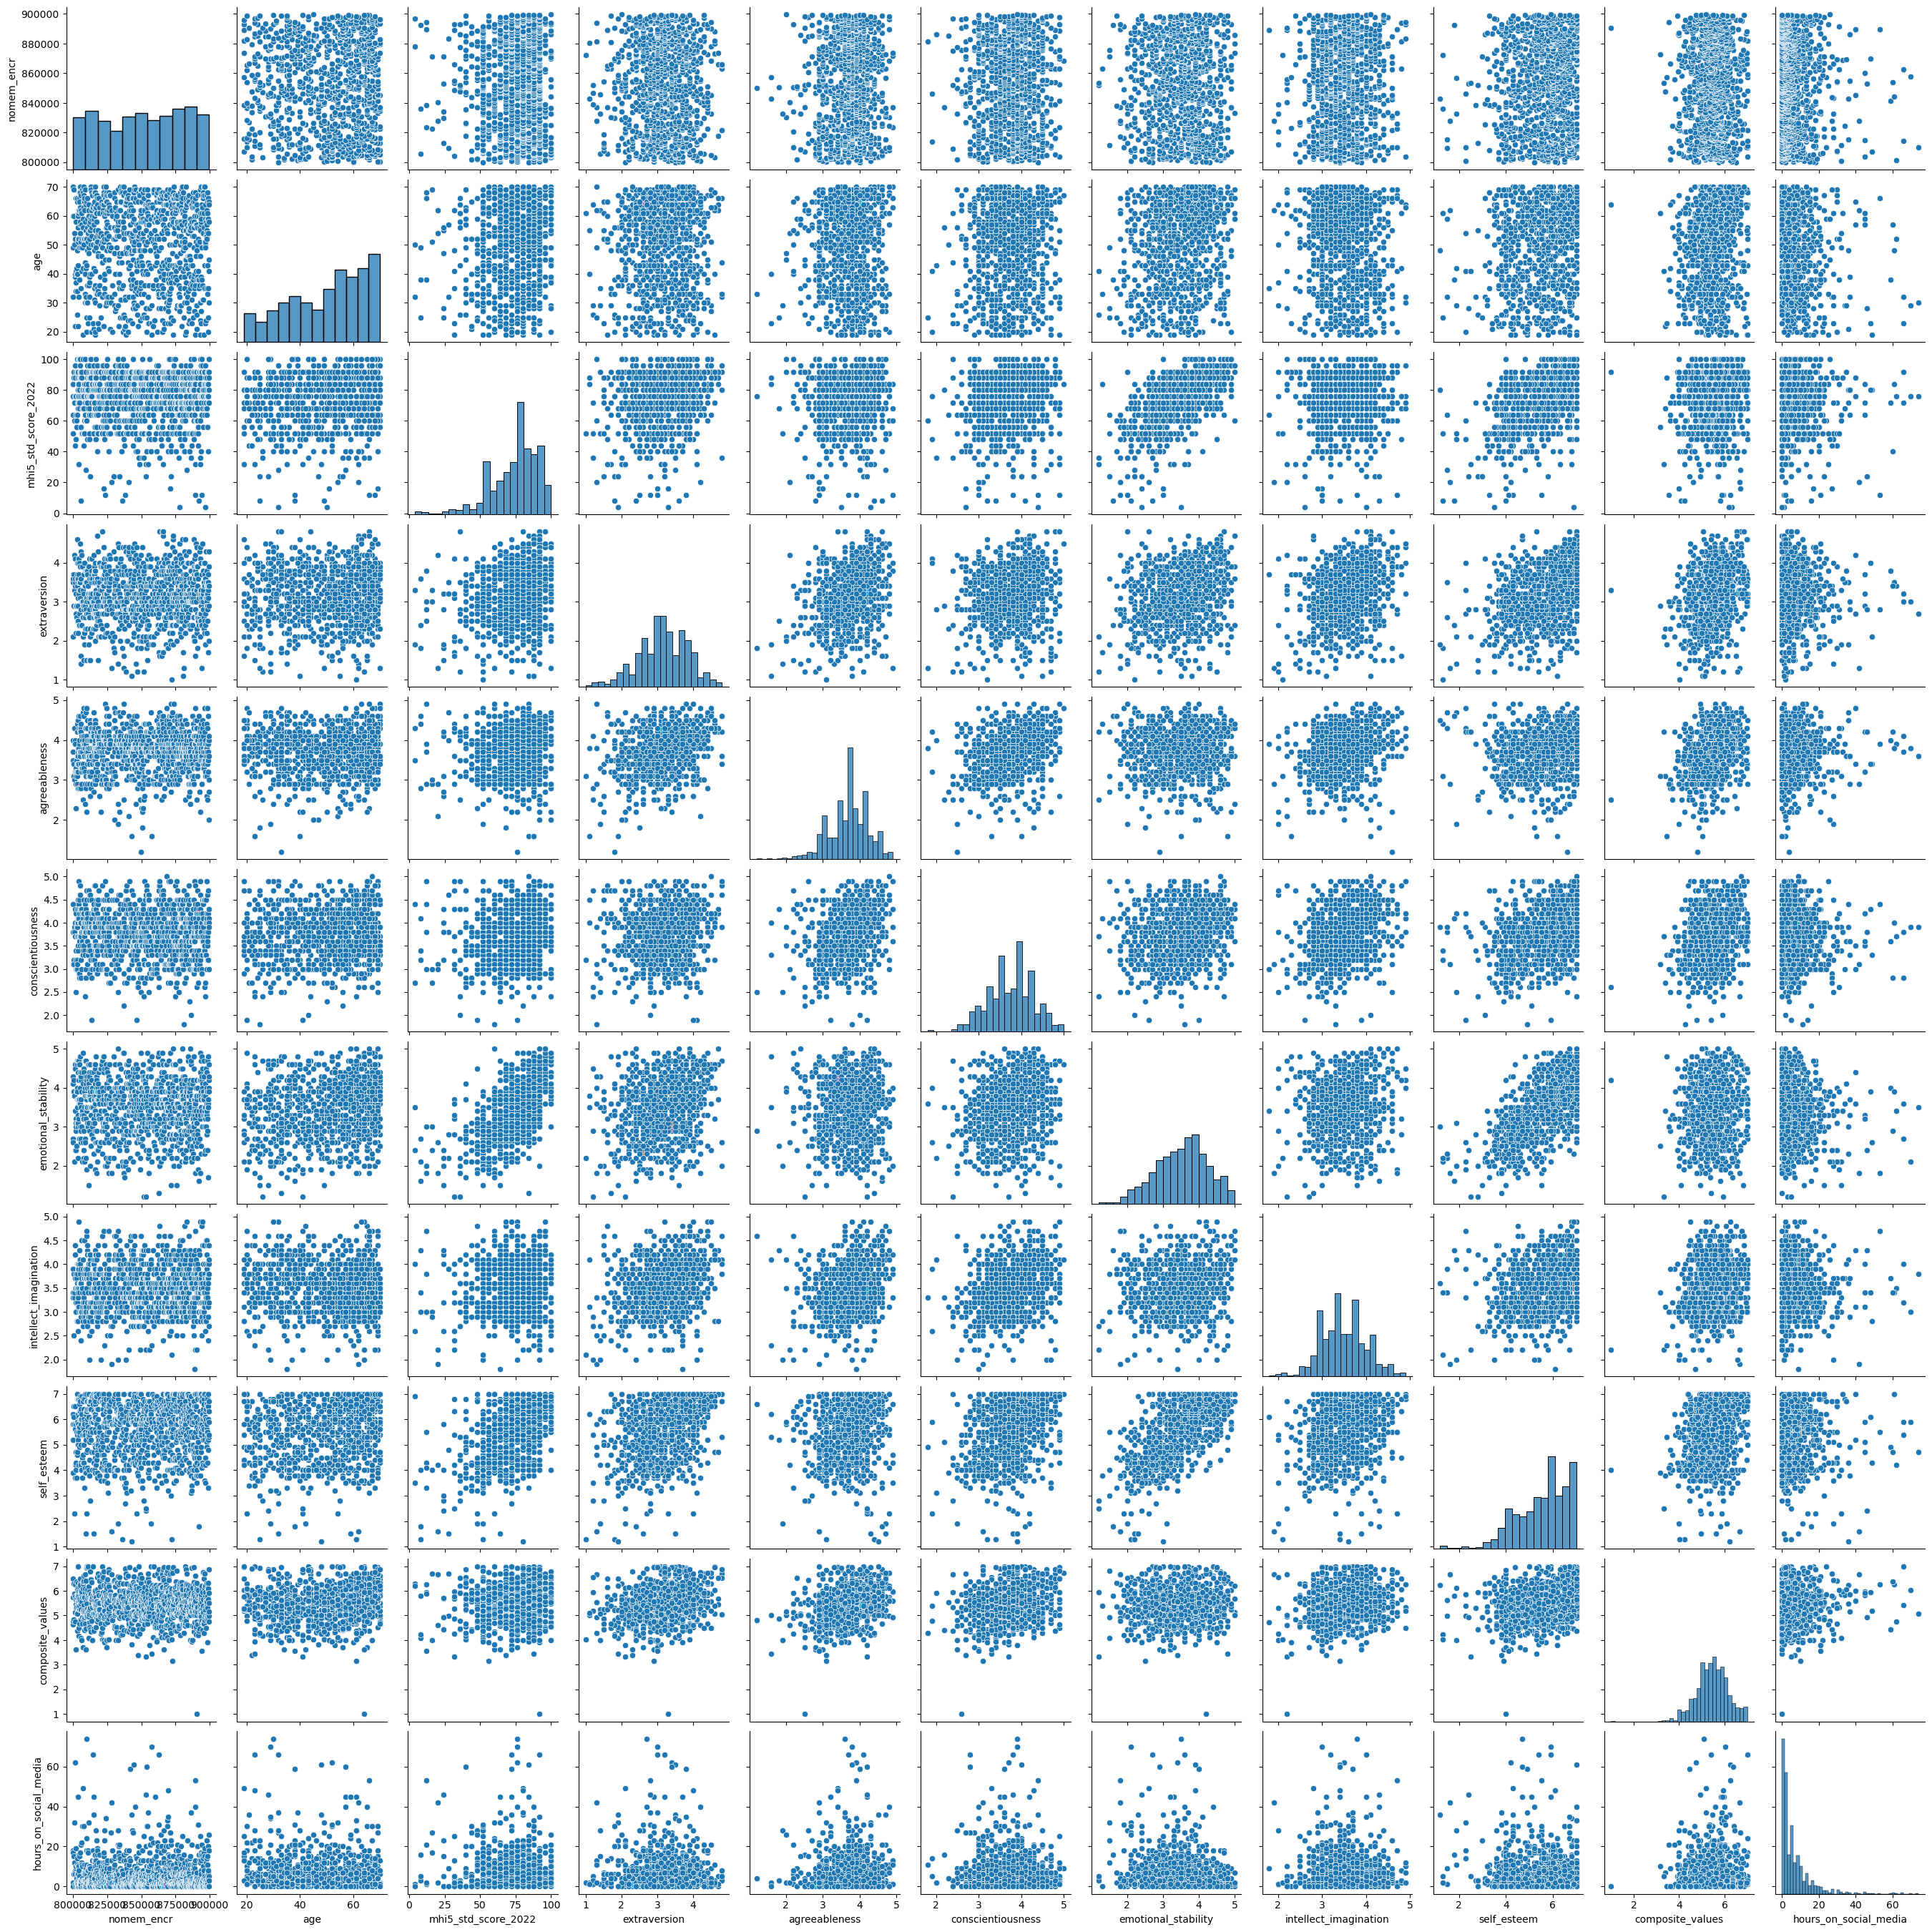

In [259]:

# Pairwise scatter plots for continuous variables
sns.pairplot(merged_data_2022[continuous_vars])
plt.show()


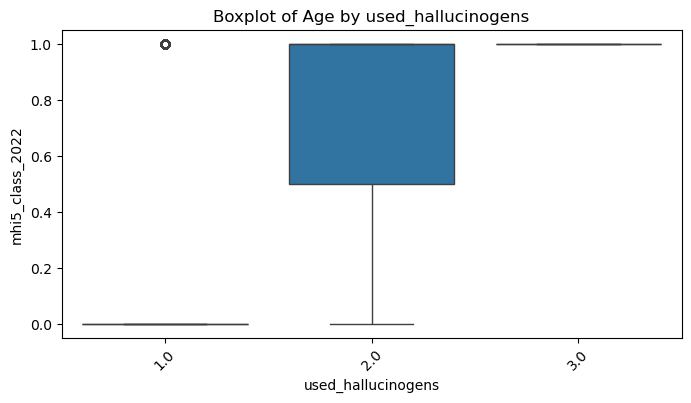

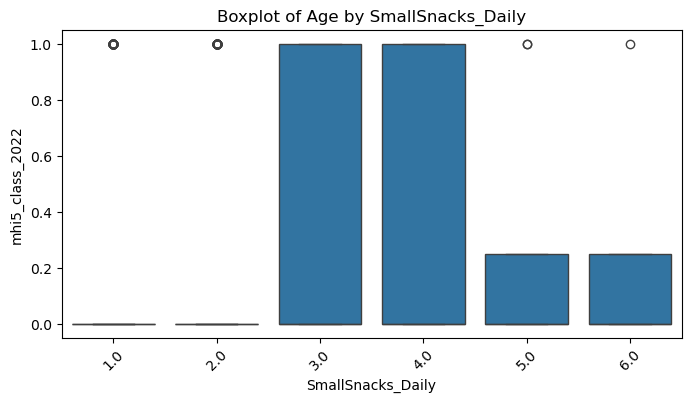

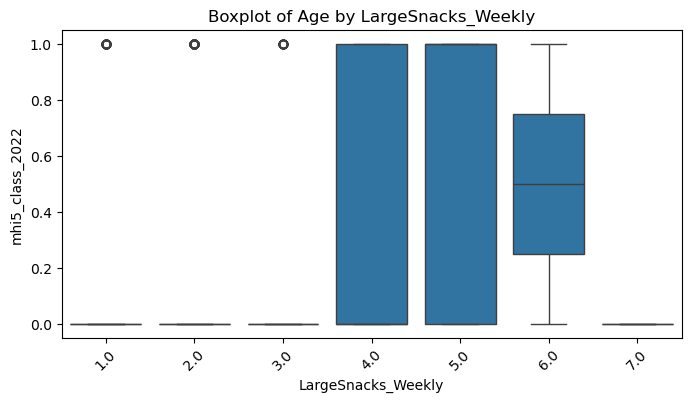

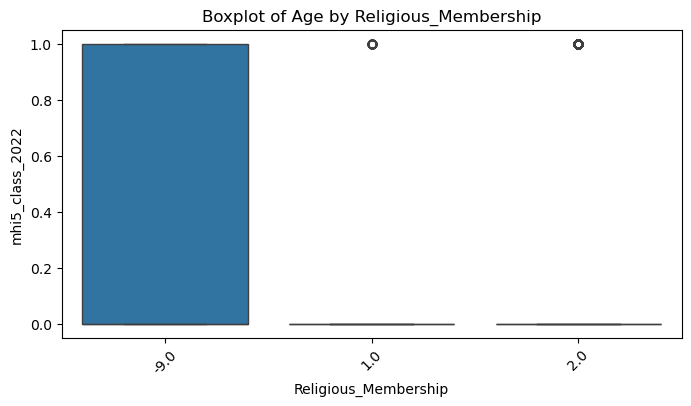

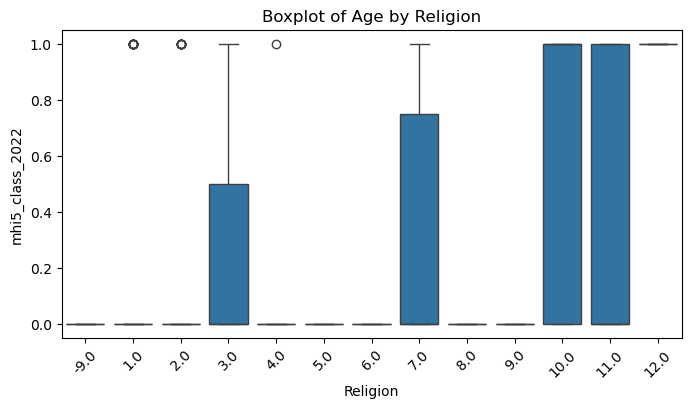

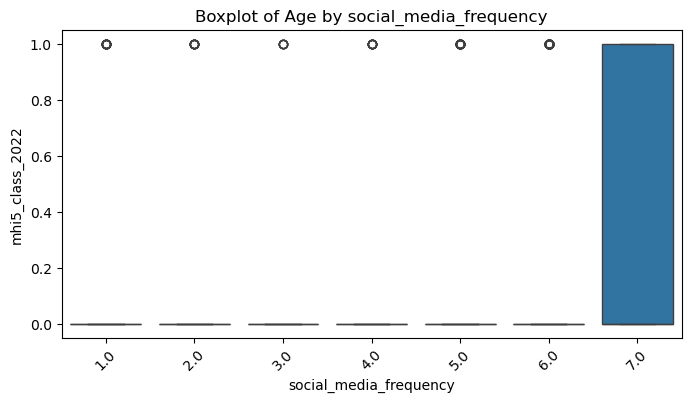

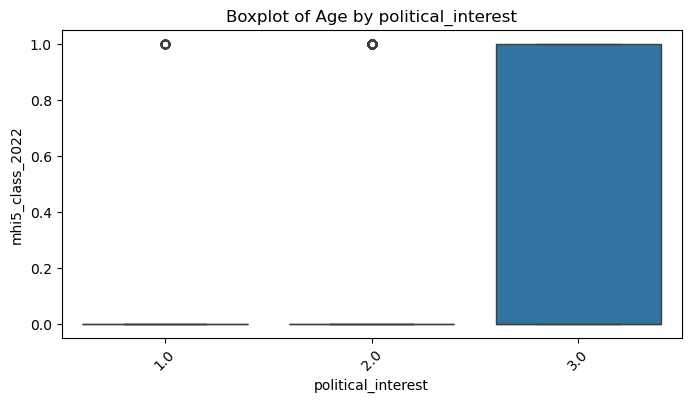

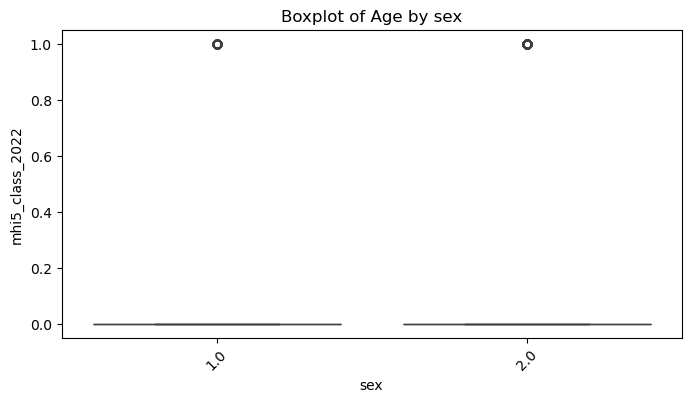

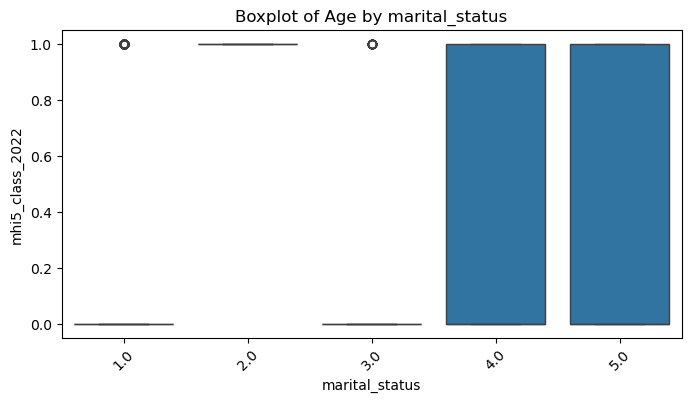

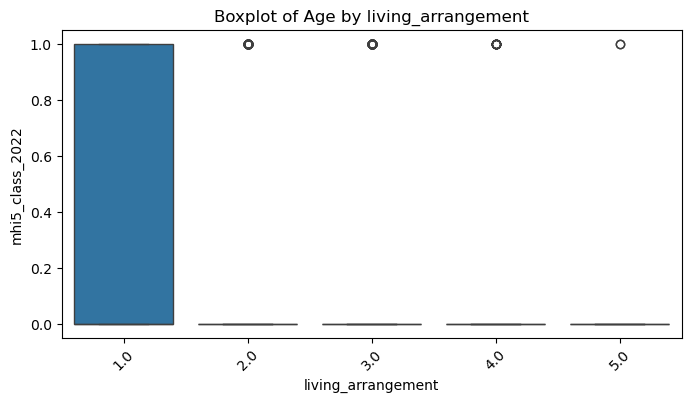

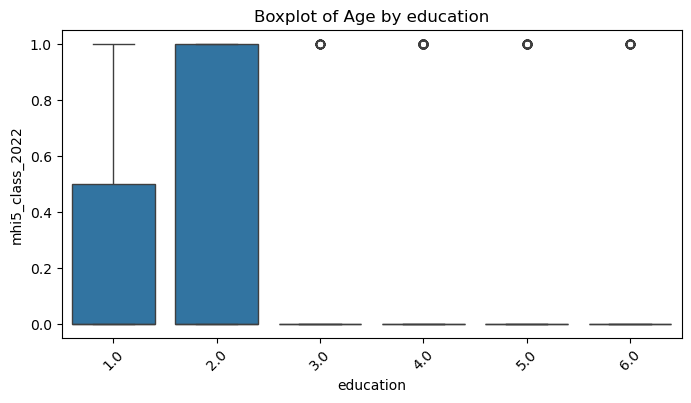

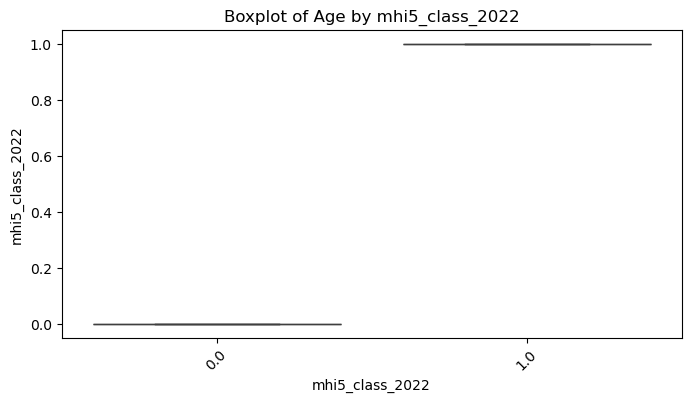

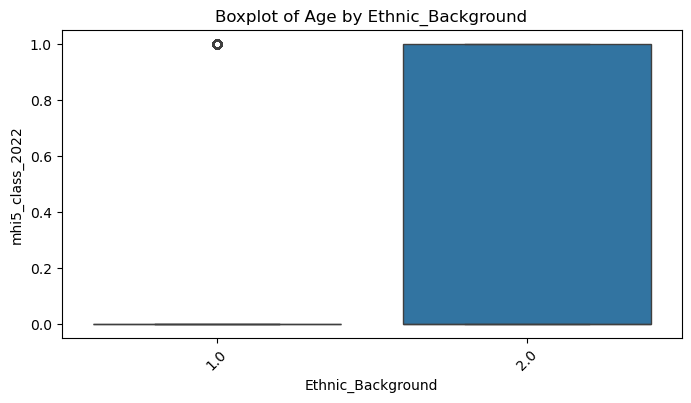

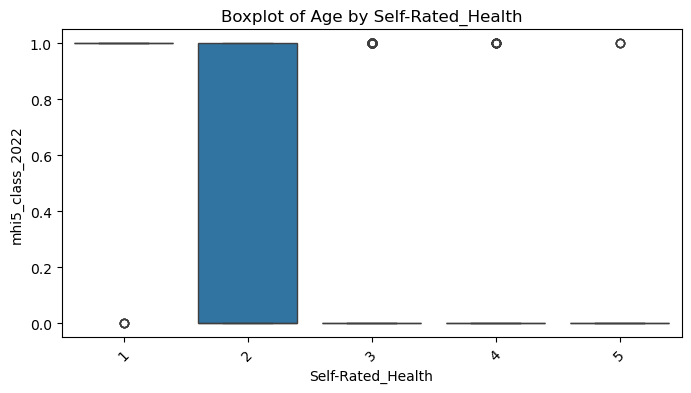

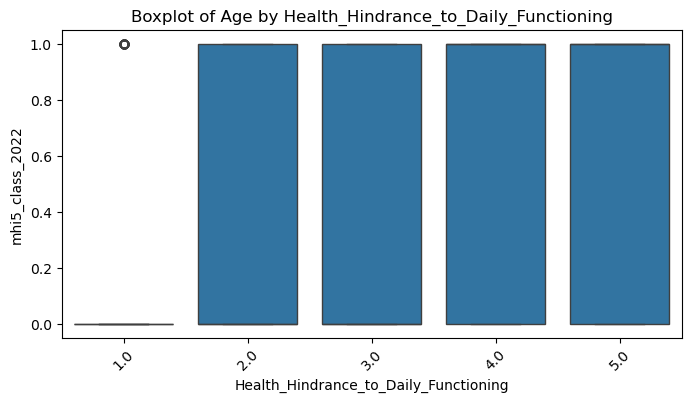

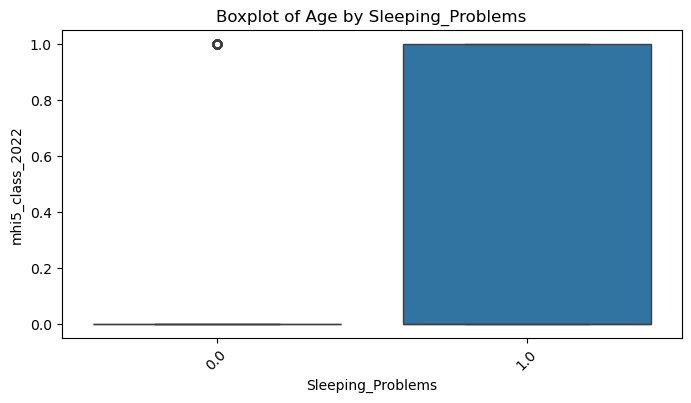

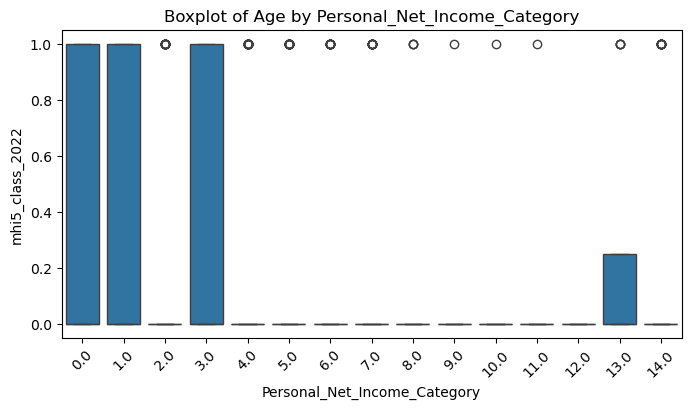

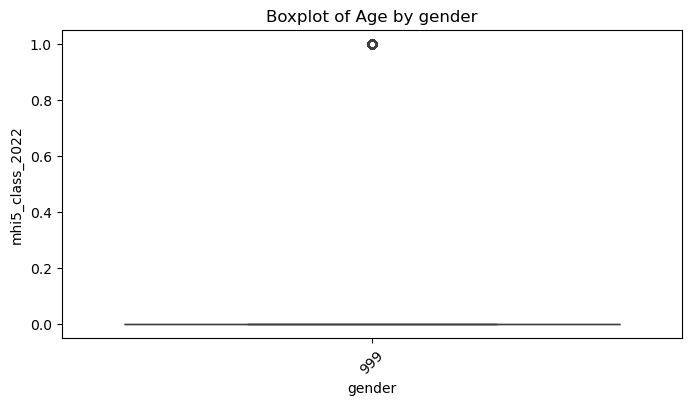

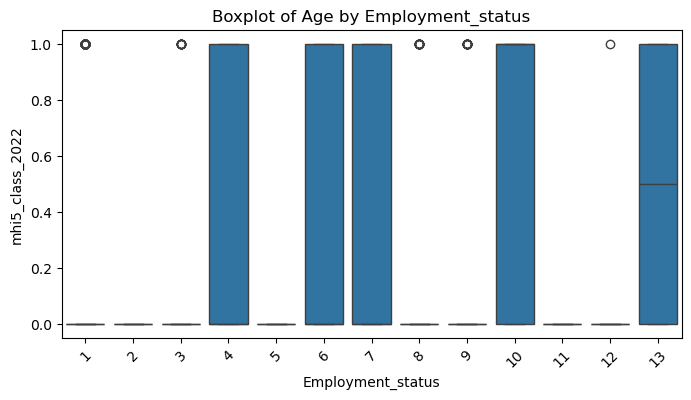

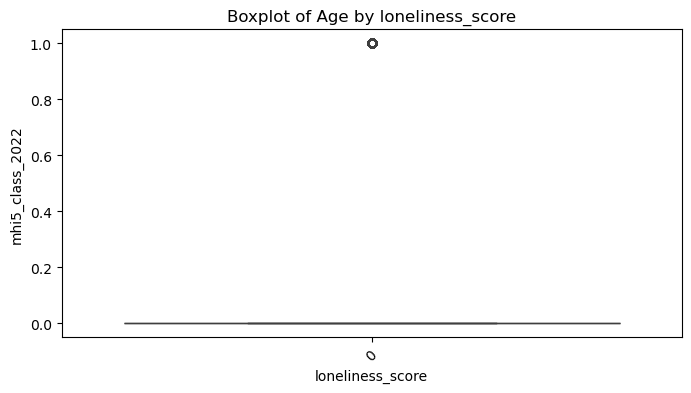

In [260]:
# Generate boxplots for categorical variables against a target (e.g., "age")
for cat in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_data_2022[cat], y=merged_data_2022["mhi5_class_2022"])  # Change "age" to any target variable
    plt.title(f'Boxplot of Age by {cat}')
    plt.xticks(rotation=45)
    plt.show()


In [270]:
merged_data_2022.info()
print(merged_data_2022.columns)
merged_data_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   used_hallucinogens                     992 non-null    float64
 1   nomem_encr                             995 non-null    int64  
 2   SmallSnacks_Daily                      991 non-null    float64
 3   LargeSnacks_Weekly                     991 non-null    float64
 4   Religious_Membership                   995 non-null    float64
 5   Religion                               218 non-null    float64
 6   social_media_frequency                 986 non-null    float64
 7   political_interest                     980 non-null    float64
 8   sex                                    995 non-null    float64
 9   age                                    995 non-null    float64
 10  marital_status                         995 non-null    float64
 11  living

used_hallucinogens  nomem_encr  SmallSnacks_Daily  LargeSnacks_Weekly  \
0                 1.0      800015                1.0                 1.0   
1                 1.0      800100                4.0                 2.0   
2                 1.0      800201                1.0                 4.0   
3                 1.0      800228                2.0                 1.0   
4                 1.0      800392                2.0                 2.0   

   Religious_Membership  Religion  social_media_frequency  political_interest  \
0                   2.0       NaN                     1.0                 1.0   
1                   1.0      10.0                     3.0                 2.0   
2                   2.0       NaN                     6.0                 2.0   
3                   2.0       NaN                     5.0                 1.0   
4                   2.0       NaN                     7.0                 1.0   

   sex   age  ...  composite_values  Ethnic_Background  Self-Rated_Health  \
0  1.0  60.0  ...          5.750000                2.0                  3   
1  2.0  32.0  ...          6.500000                2.0                  2   
2  1.0  49.0  ...          4.638889                1.0                  3   
3  1.0  70.0  ...          4.777778                1.0                  3   
4  1.0  60.0  ...          4.833333                1.0                  3   

   Health_Hindrance_to_Daily_Functioning  Sleeping_Problems  \
0                                    1.0                0.0   
1                                    3.0                0.0   
2                                    2.0                0.0   
3                                    2.0                0.0   
4                                    2.0                0.0   

   Personal_Net_Income_Category  gender  Employment_status  loneliness_score  \
0                           7.0     999                  1                 0   
1                           4.0     999                  1                 0   
2                           4.0     999                  1                 0   
3                           6.0     999                  9                 0   
4                           5.0     999                  4                 0   

   hours_on_social_media  
0                    2.0  
1                   18.0  
2                   17.0  
3                    0.0  
4                    6.0  

[5 rows x 31 columns]

In [272]:
# save dataset
merged_data_2022.to_csv("merged_dataset2022.csv", index=False)